# Anime Data Analysis

This Jupyter Notebook performs data analysis on two datasets: `anime.csv` and `rating.csv`. The analysis includes data cleaning, basic statistics, and visualizations. Below is a summary of the contents:

1. **Data Import and Initial Setup**:
   - Import necessary libraries: `pandas`, `matplotlib.pyplot`, and `seaborn`.
   - Load datasets: `anime.csv` and `rating.csv`.

2. **Data Cleaning**:
   - **Anime Dataset (`anime.csv`)**:
     - Check for and handle missing values.
     - Remove duplicates.
     - Convert data types where necessary (e.g., 'episodes' column).
   - **Ratings Dataset (`rating.csv`)**:
     - Check for and handle missing values.
     - Remove duplicates.
     - Convert data types where necessary (e.g., 'rating' column).

3. **Data Analysis and Visualization**:
   - Display basic statistics of the 'rating' column in the anime dataset.
   - Plot the distribution of anime scores.
   - Identify and display the top 5 anime based on scores.
   - Plot the top 5 anime with the highest scores.

4. **Ratings Summary**:
   - Group ratings by `anime_id` to calculate the sum and count of ratings.
   - Merge the ratings summary with the anime data to include anime names.

5. **Top Anime by Ratings**:
   - Identify and display the top 10 anime by count, sum and mean of ratings.
   - Plot the top 10 anime by count, sum and mean of ratings.

This notebook provides insights into the anime dataset and helps visualize the distribution and popularity of different anime based on user ratings.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
anime_data = pd.read_csv('anime.csv')
ratings_data = pd.read_csv('rating.csv')

In [38]:
# Basic Data Cleaning for anime.csv
# Check for missing values
print("Missing values in anime.csv:")
print(anime_data.isnull().sum())

# Fill or drop missing values
anime_data.dropna(subset=['rating'], inplace=True)

# Check for duplicates and remove them
anime_data.drop_duplicates(inplace=True)

# Convert data types if necessary
anime_data['episodes'] = anime_data['episodes'].replace('Unknown', 0).astype(int)

# Display cleaned data
print("\nCleaned anime.csv:")
print(anime_data.head())

Missing values in anime.csv:
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Cleaned anime.csv:
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type  episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie         1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV        64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV        51    9.25   
3                                   Sci-Fi, Thriller     TV        24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV        51    9.16   

   members  
0   200630  
1   793665  
2   1

In [39]:
# Basic Data Cleaning for ratings.csv
# Check for missing values
print("\nMissing values in ratings.csv:")
print(ratings_data.isnull().sum())

# Check for duplicates and remove them
ratings_data.drop_duplicates(inplace=True)

# Convert data types if necessary
ratings_data['rating'] = ratings_data['rating'].astype(float)

print("\nCleaned ratings.csv:")
print(ratings_data.head())


Missing values in ratings.csv:
user_id     0
anime_id    0
rating      0
dtype: int64

Cleaned ratings.csv:
   user_id  anime_id  rating
0        1        20    -1.0
1        1        24    -1.0
2        1        79    -1.0
3        1       226    -1.0
4        1       241    -1.0


count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64


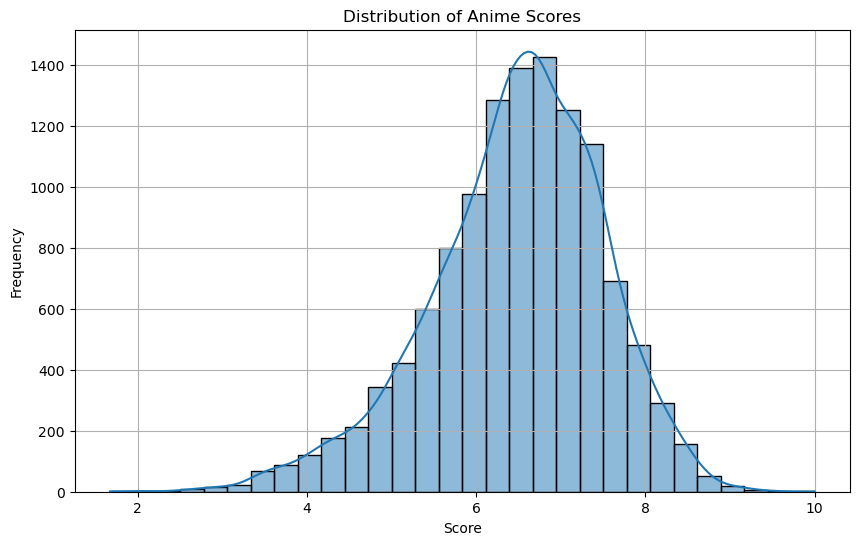

In [40]:
# Display basic statistics of the 'rating' column
print(anime_data['rating'].describe())

# Plot the distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(anime_data['rating'], bins=30, kde=True)
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Top 5 Anime with the Highest Scores:
                                          name  rating  \
10464  Taka no Tsume 8: Yoshida-kun no X-Files   10.00   
10400              Spoon-hime no Swing Kitchen    9.60   
9595                          Mogura no Motoro    9.50   
0                               Kimi no Na wa.    9.37   
9078                              Kahei no Umi    9.33   

                                      genre   type  episodes  members  
10464                        Comedy, Parody  Movie         1       13  
10400                       Adventure, Kids     TV         0       47  
9595                          Slice of Life  Movie         1       62  
0      Drama, Romance, School, Supernatural  Movie         1   200630  
9078                             Historical  Movie         1       44  


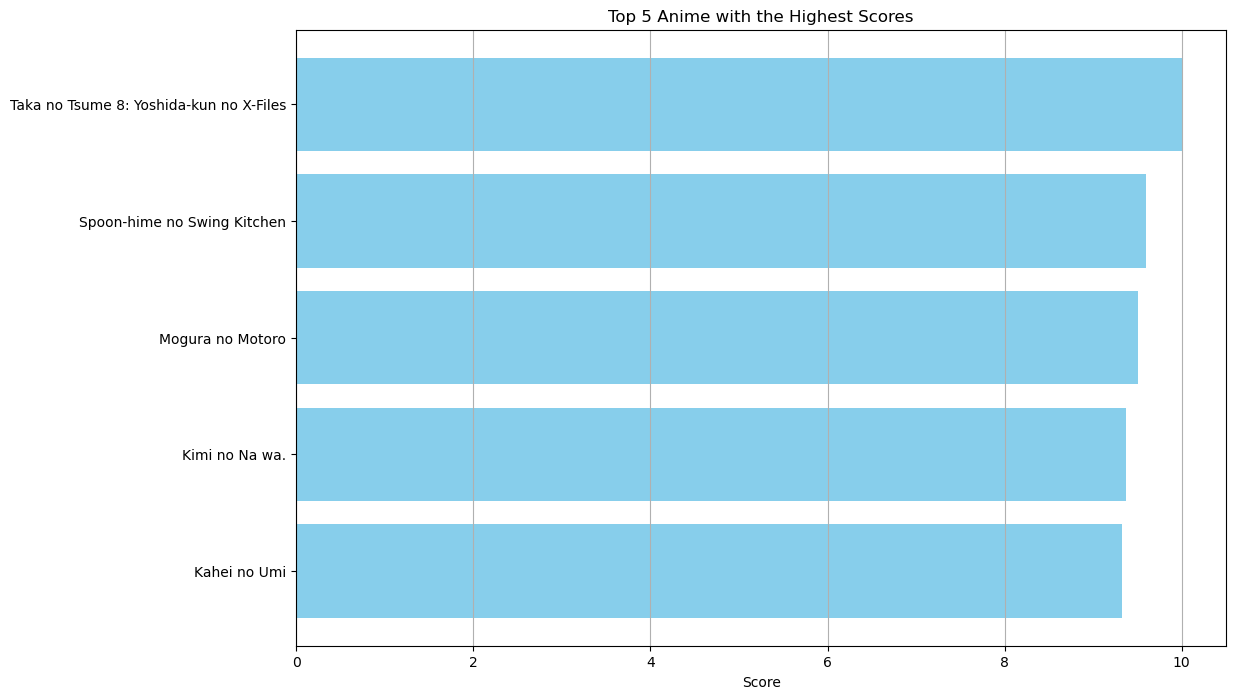

In [41]:
# Sort the dataset by rating in descending order and take the top 5
top_5_anime = anime_data.sort_values(by='rating', ascending=False).head(5)

# Display the top 5 anime
print("Top 5 Anime with the Highest Scores:")
print(top_5_anime[['name', 'rating', 'genre', 'type', 'episodes', 'members']])

# Plot the top 5 anime
plt.figure(figsize=(12, 8))
plt.barh(top_5_anime['name'], top_5_anime['rating'], color='skyblue')
plt.xlabel('Score')
plt.title('Top 5 Anime with the Highest Scores')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.grid(axis='x')
plt.show()

In [42]:
# Group the ratings by anime_id and calculate the sum and count of ratings
ratings_summary = ratings_data.groupby('anime_id')['rating'].agg(['sum', 'count','mean']).reset_index()

# Merge the ratings summary with the anime data to get the name
anime_ratings_summary = pd.merge(anime_data[['anime_id', 'name']], ratings_summary, on='anime_id')

# Display the resulting DataFrame
anime_ratings_summary.head()

,anime_id,name,sum,count,mean
0,32281,Kimi no Na wa.,18247.0,2199,8.297863
1,5114,Fullmetal Alchemist: Brotherhood,197303.0,24574,8.028933
2,28977,Gintama°,11028.0,1386,7.956710
3,9253,Steins;Gate,156709.0,19283,8.126796
4,9969,Gintama&#039;,28326.0,3673,7.711952


In [43]:
# Sort by count of ratings and take the top 10
top_10_anime_count = anime_ratings_summary.sort_values(by='count', ascending=False).head(10)
top_10_anime_count

,anime_id,name,sum,count,mean
39,1535,Death Note,297260.0,39340,7.556177
787,11757,Sword Art Online,209896.0,30583,6.863159
82,16498,Shingeki no Kyojin,216372.0,29583,7.314066
19,1575,Code Geass: Hangyaku no Lelouch,211800.0,27718,7.641244
743,226,Elfen Lied,185762.0,27506,6.753508
154,6547,Angel Beats!,197856.0,27183,7.278667
823,20,Naruto,170372.0,25925,6.571726
194,121,Fullmetal Alchemist,176627.0,25032,7.056048
1,5114,Fullmetal Alchemist: Brotherhood,197303.0,24574,8.028933
127,4224,Toradora!,175686.0,24283,7.234938


In [44]:
# Sort by sum of ratings and take the top 10
top_10_anime_sum = anime_ratings_summary.sort_values(by='sum', ascending=False).head(10)
top_10_anime_sum

,anime_id,name,sum,count,mean
39,1535,Death Note,297260.0,39340,7.556177
82,16498,Shingeki no Kyojin,216372.0,29583,7.314066
19,1575,Code Geass: Hangyaku no Lelouch,211800.0,27718,7.641244
787,11757,Sword Art Online,209896.0,30583,6.863159
154,6547,Angel Beats!,197856.0,27183,7.278667
1,5114,Fullmetal Alchemist: Brotherhood,197303.0,24574,8.028933
13,2904,Code Geass: Hangyaku no Lelouch R2,188262.0,24242,7.765943
743,226,Elfen Lied,185762.0,27506,6.753508
194,121,Fullmetal Alchemist,176627.0,25032,7.056048
127,4224,Toradora!,175686.0,24283,7.234938


In [45]:
# Sort by mean of ratings and take the top 10
top_10_anime_mean = anime_ratings_summary.sort_values(by='mean', ascending=False).head(10)
top_10_anime_mean

,anime_id,name,sum,count,mean
8147,31211,Choegang Top Plate,10.0,1,10.000000
9939,33791,Warui no wo Taose!! Salaryman Man,10.0,1,10.000000
9572,33484,Shiroi Zou,10.0,1,10.000000
5445,34252,STAR BEAT!: Hoshi no Kodou,10.0,1,10.000000
6736,31972,Tang Lang Bu Chan,9.0,1,9.000000
8241,32422,Doukyuusei,18.0,2,9.000000
9980,29837,"Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, V...",9.0,1,9.000000
9567,30939,Shiranpuri,9.0,1,9.000000
0,32281,Kimi no Na wa.,18247.0,2199,8.297863
7,820,Ginga Eiyuu Densetsu,7440.0,903,8.239203


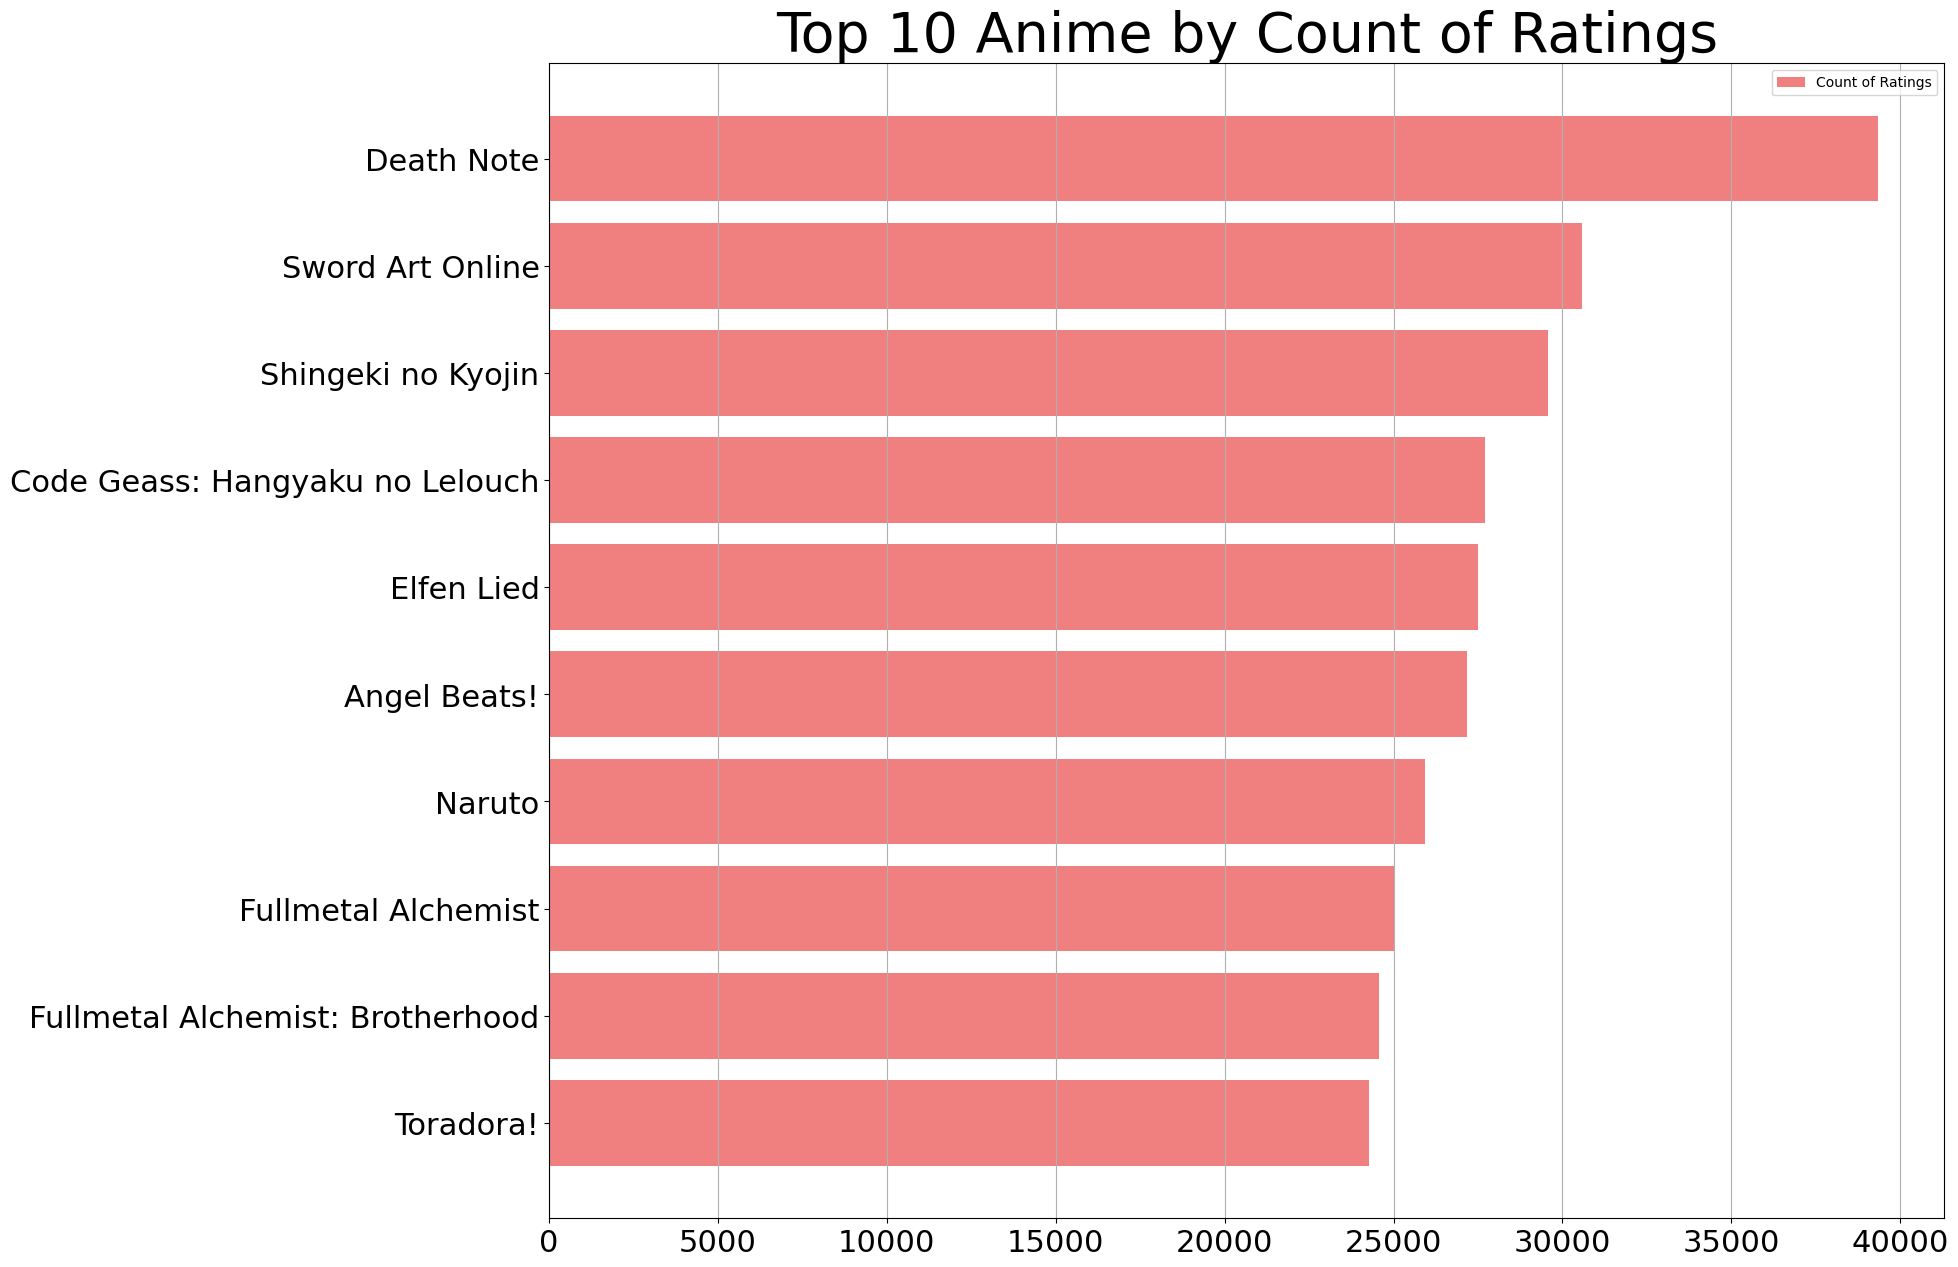

In [46]:
# Plot the top 10 anime by count of ratings
plt.figure(figsize=(14, 8))
plt.barh(top_10_anime_count['name'], top_10_anime_count['count'], color='lightcoral', label='Count of Ratings')
plt.title('Top 10 Anime by Count of Ratings', fontsize=40)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.xlabel('')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gcf().set_size_inches(18, 15)
plt.grid(axis='x')
plt.legend()
plt.show()

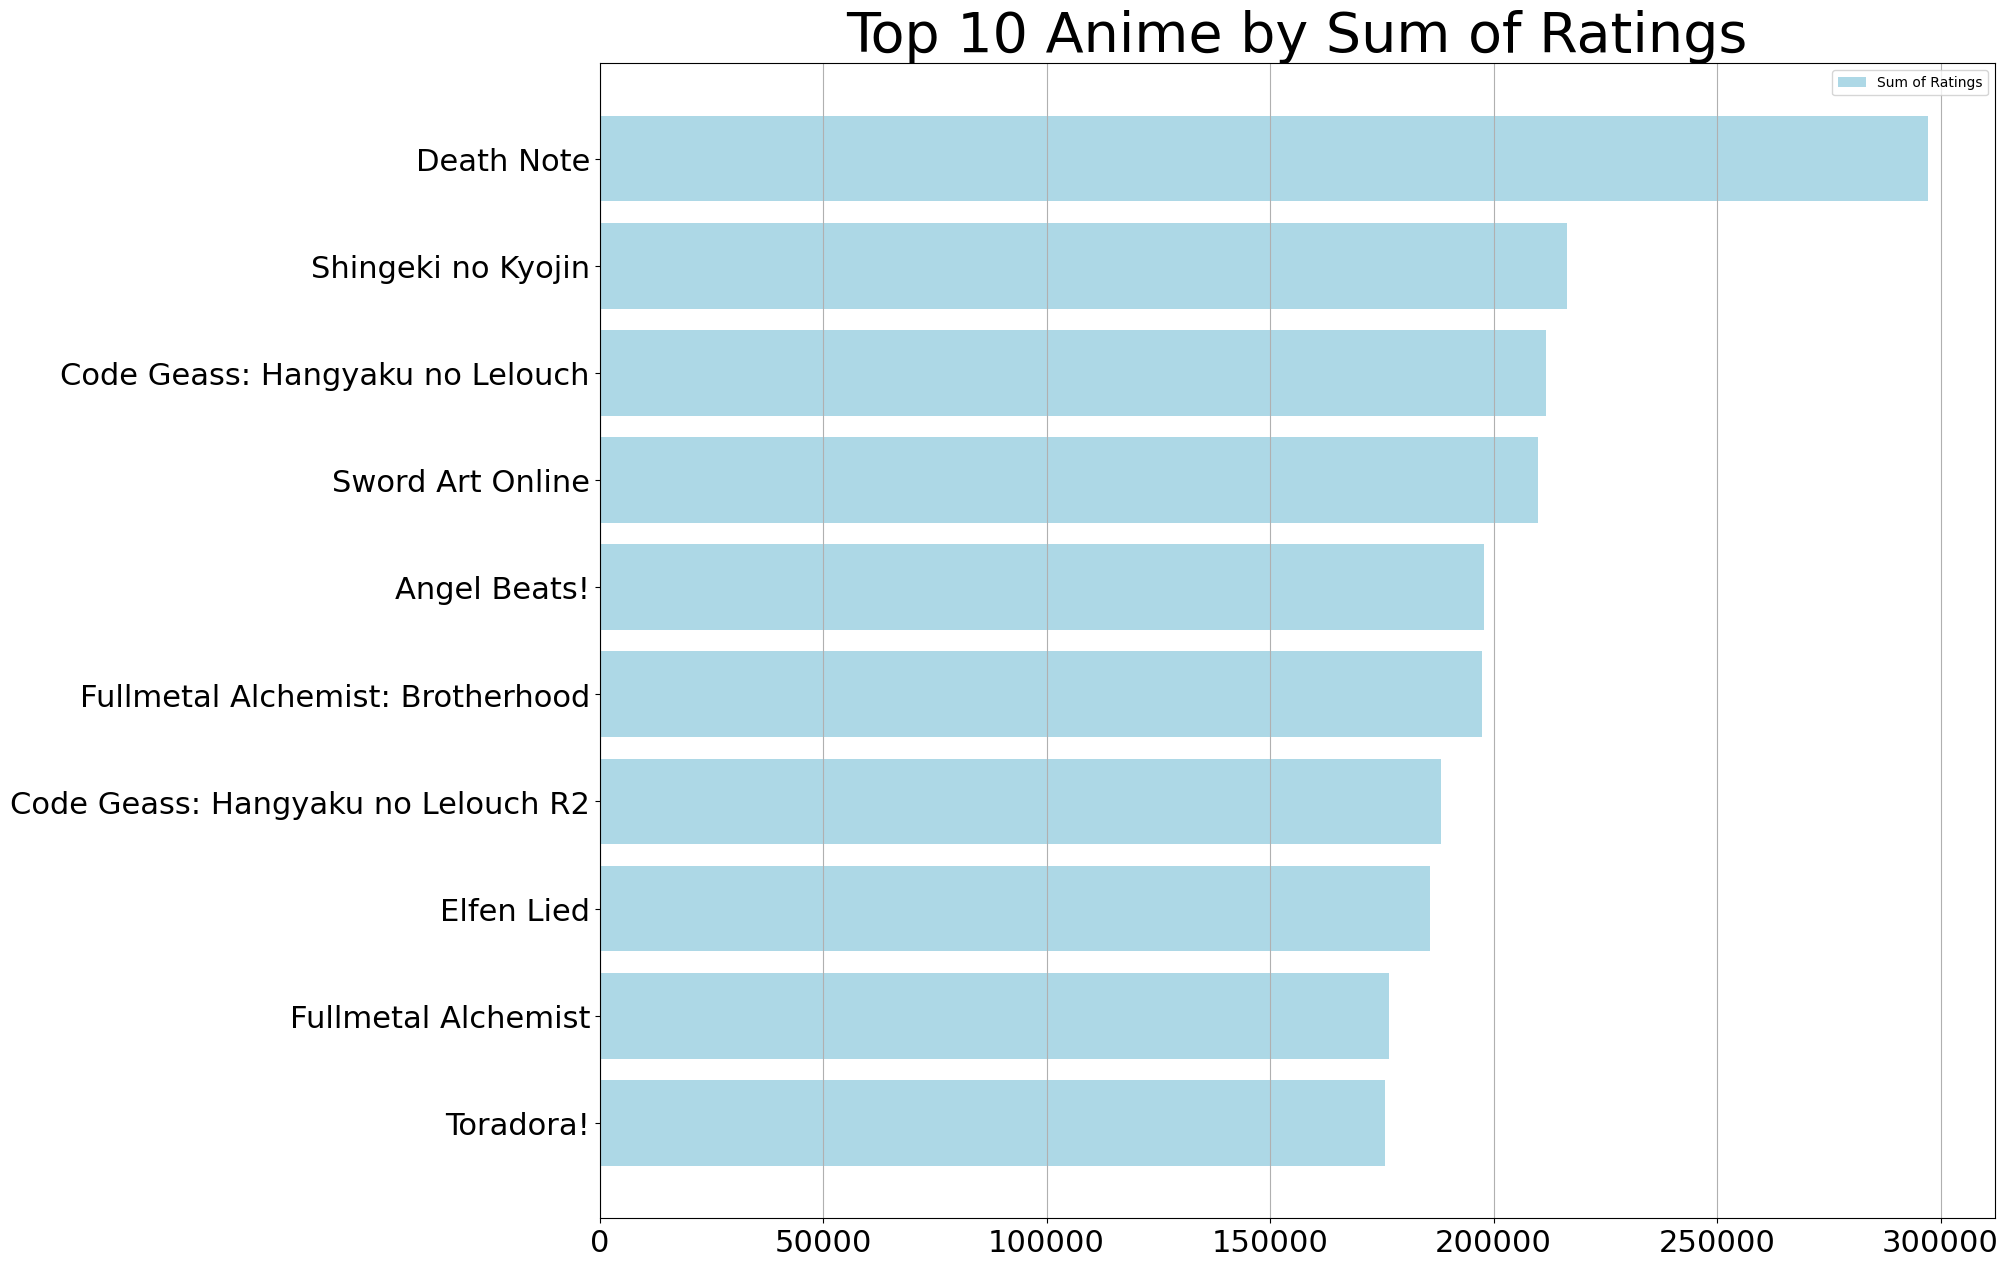

In [47]:
# Plot the top 10 anime by sum of ratings
plt.figure(figsize=(14, 8))
plt.barh(top_10_anime_sum['name'], top_10_anime_sum['sum'], color='lightblue', label='Sum of Ratings')
plt.title('Top 10 Anime by Sum of Ratings', fontsize=40)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest sum on top
plt.xlabel('')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gcf().set_size_inches(18, 15)
plt.grid(axis='x')
plt.legend()
plt.show()

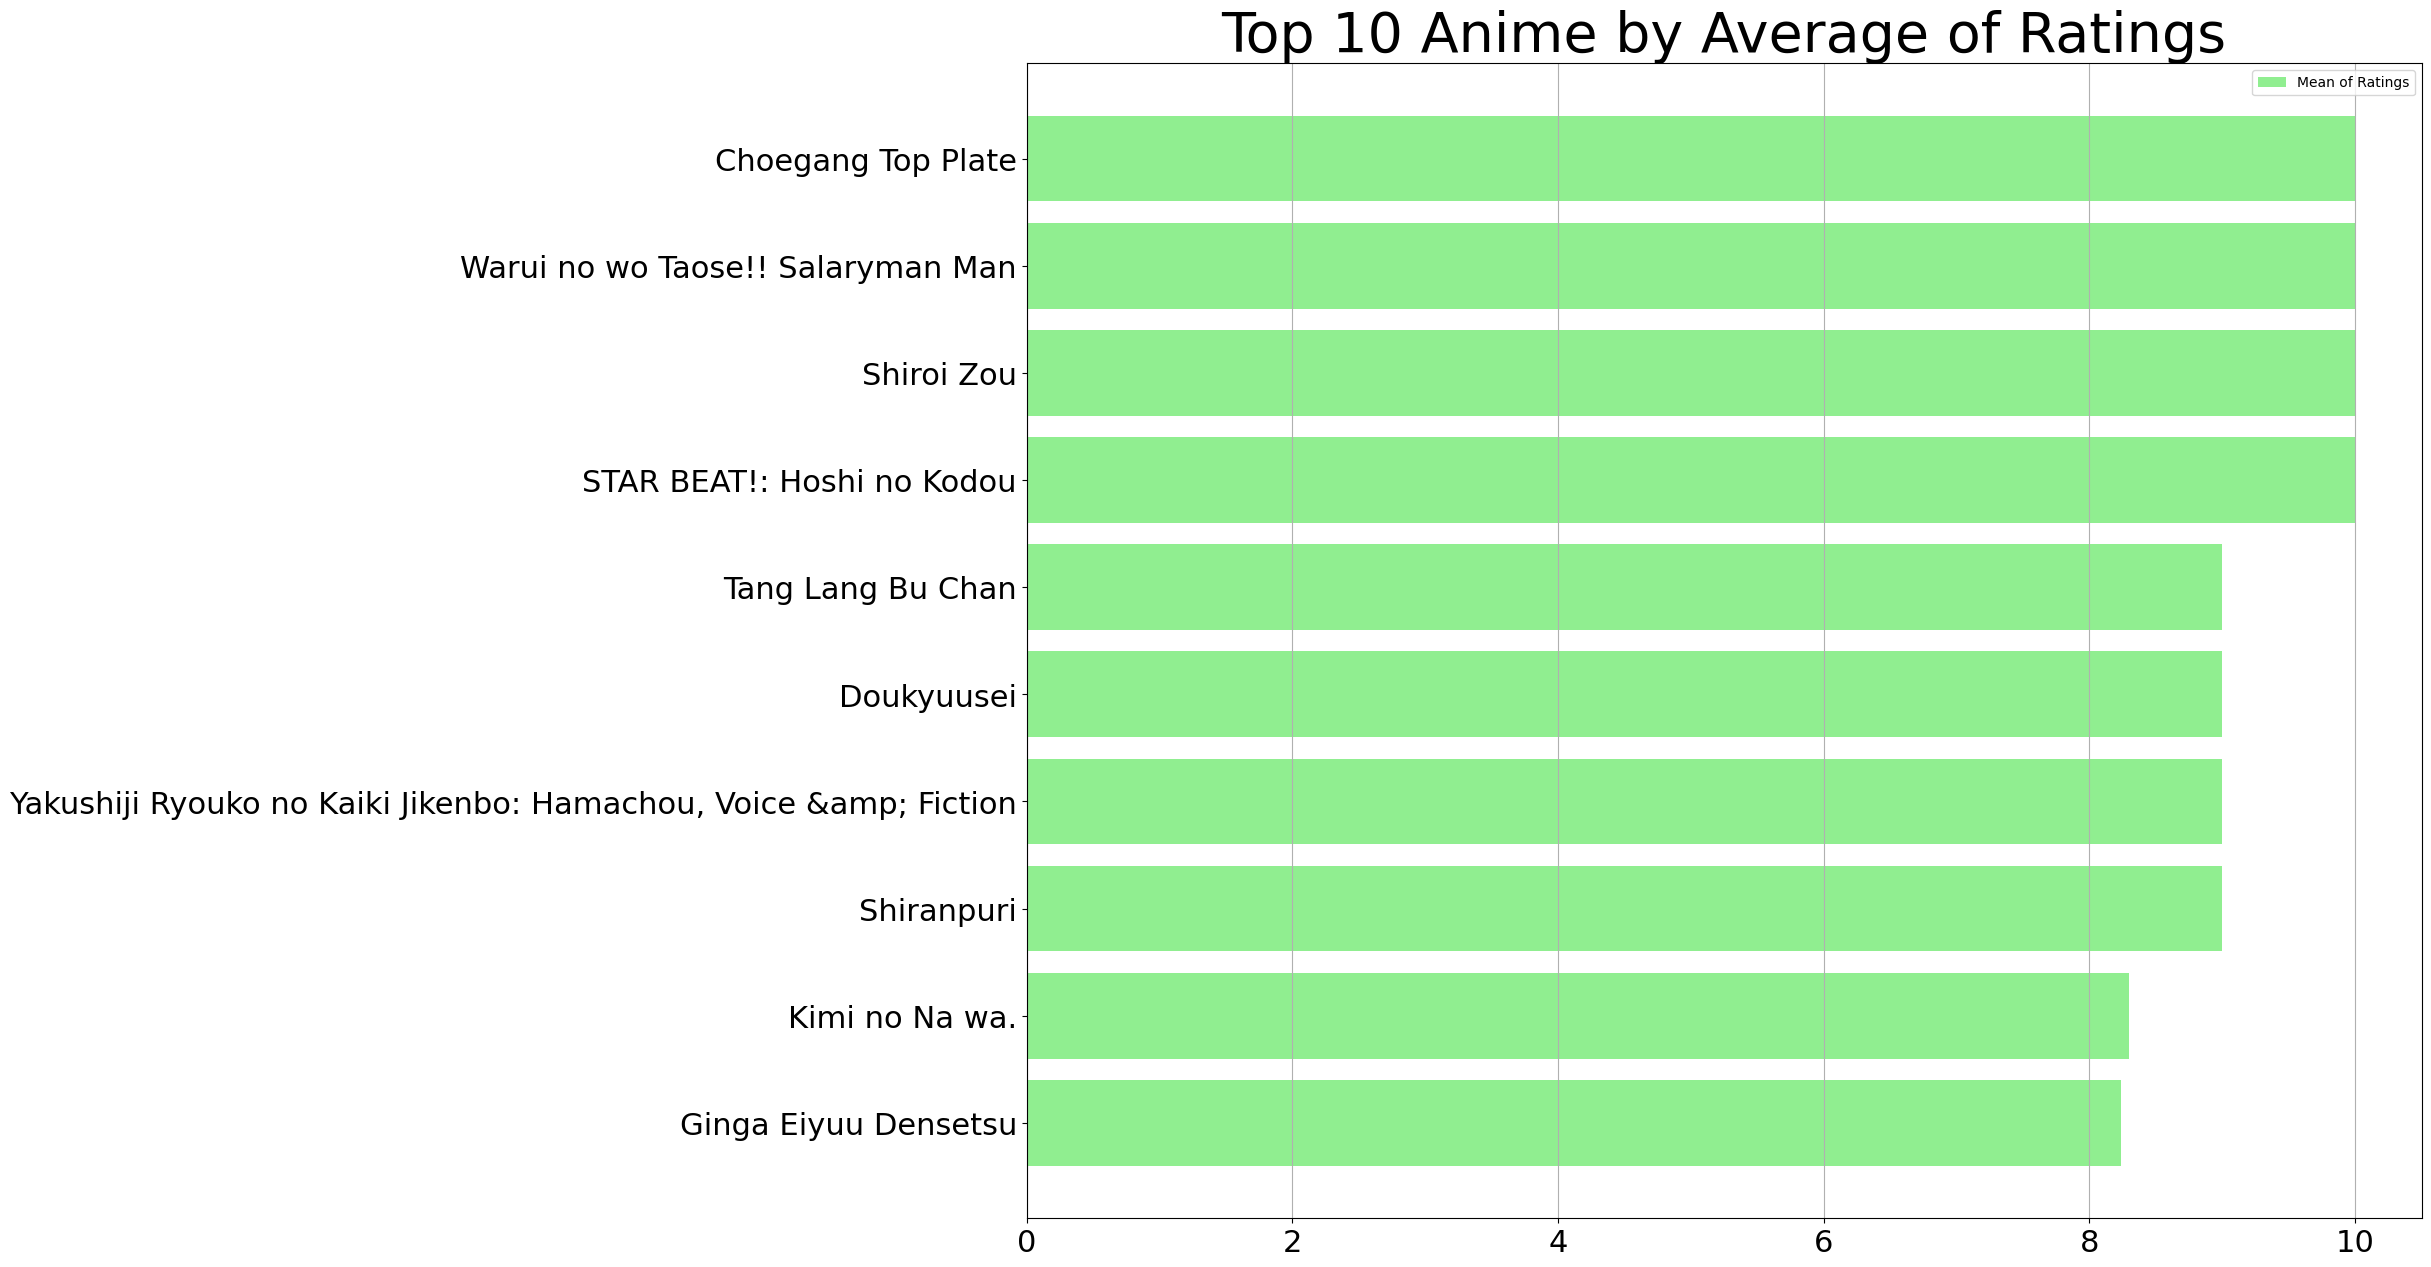

In [48]:
# Plot the top 10 anime by sum of ratings
plt.figure(figsize=(14, 8))
plt.barh(top_10_anime_mean['name'], top_10_anime_mean['mean'], color='lightgreen', label='Mean of Ratings')
plt.title('Top 10 Anime by Average of Ratings', fontsize=40)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest sum on top
plt.xlabel('')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.gcf().set_size_inches(18, 15)
plt.grid(axis='x')
plt.legend()
plt.show()